In [40]:
import pandas as pd #data frame
import numpy as np #calculation
import matplotlib.pyplot as plt #visualization
from sklearn.metrics import r2_score #score of our model
from sklearn.model_selection import RandomizedSearchCV #random search for better accuarcy (hyperparameter tunning)
from sklearn.ensemble import RandomForestRegressor #random forest regression 
from sklearn.model_selection import train_test_split #train test split 20%
from sklearn.ensemble import ExtraTreesRegressor #getting faeture importance
import seaborn as sns # advance visaulization

In [41]:
data=pd.read_csv("car.csv") #loading data
data.head() #displaying data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [42]:
print(data.shape) #shape of data
data.info() #info of data

(301, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [43]:
data.describe(include="all") # descrbtion of data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [44]:
print(data["Car_Name"].unique()) #unique values in objects
print(data["Fuel_Type"].unique())
print(data["Seller_Type"].unique())
print(data["Transmission"].unique())
print(data["Owner"].unique())

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [45]:
data.isnull().values.any() #nan values 

False

In [46]:
data["year"]=2020-data["Year"] #converting year into number (2020-2014=6)

In [47]:
data["year"] #displaying nos of year

0       6
1       7
2       3
3       9
4       6
       ..
296     4
297     5
298    11
299     3
300     4
Name: year, Length: 301, dtype: int64

In [48]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [49]:
newdata=data.drop(columns=["Year","Car_Name"],axis=1) #Deleteing year and car name no need of these faetures 

In [50]:
newdata.head(2) #new data 

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7


In [51]:
newdata=pd.get_dummies(newdata,drop_first=True) #creating dummies varibale for object(one hot endcoding)

In [52]:
newdata.head(2) # displaying data

,Selling_Price,Present_Price,Kms_Driven,Owner,year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1


In [53]:
newdata.corr() #correlation between all faetures

,Selling_Price,Present_Price,Kms_Driven,Owner,year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


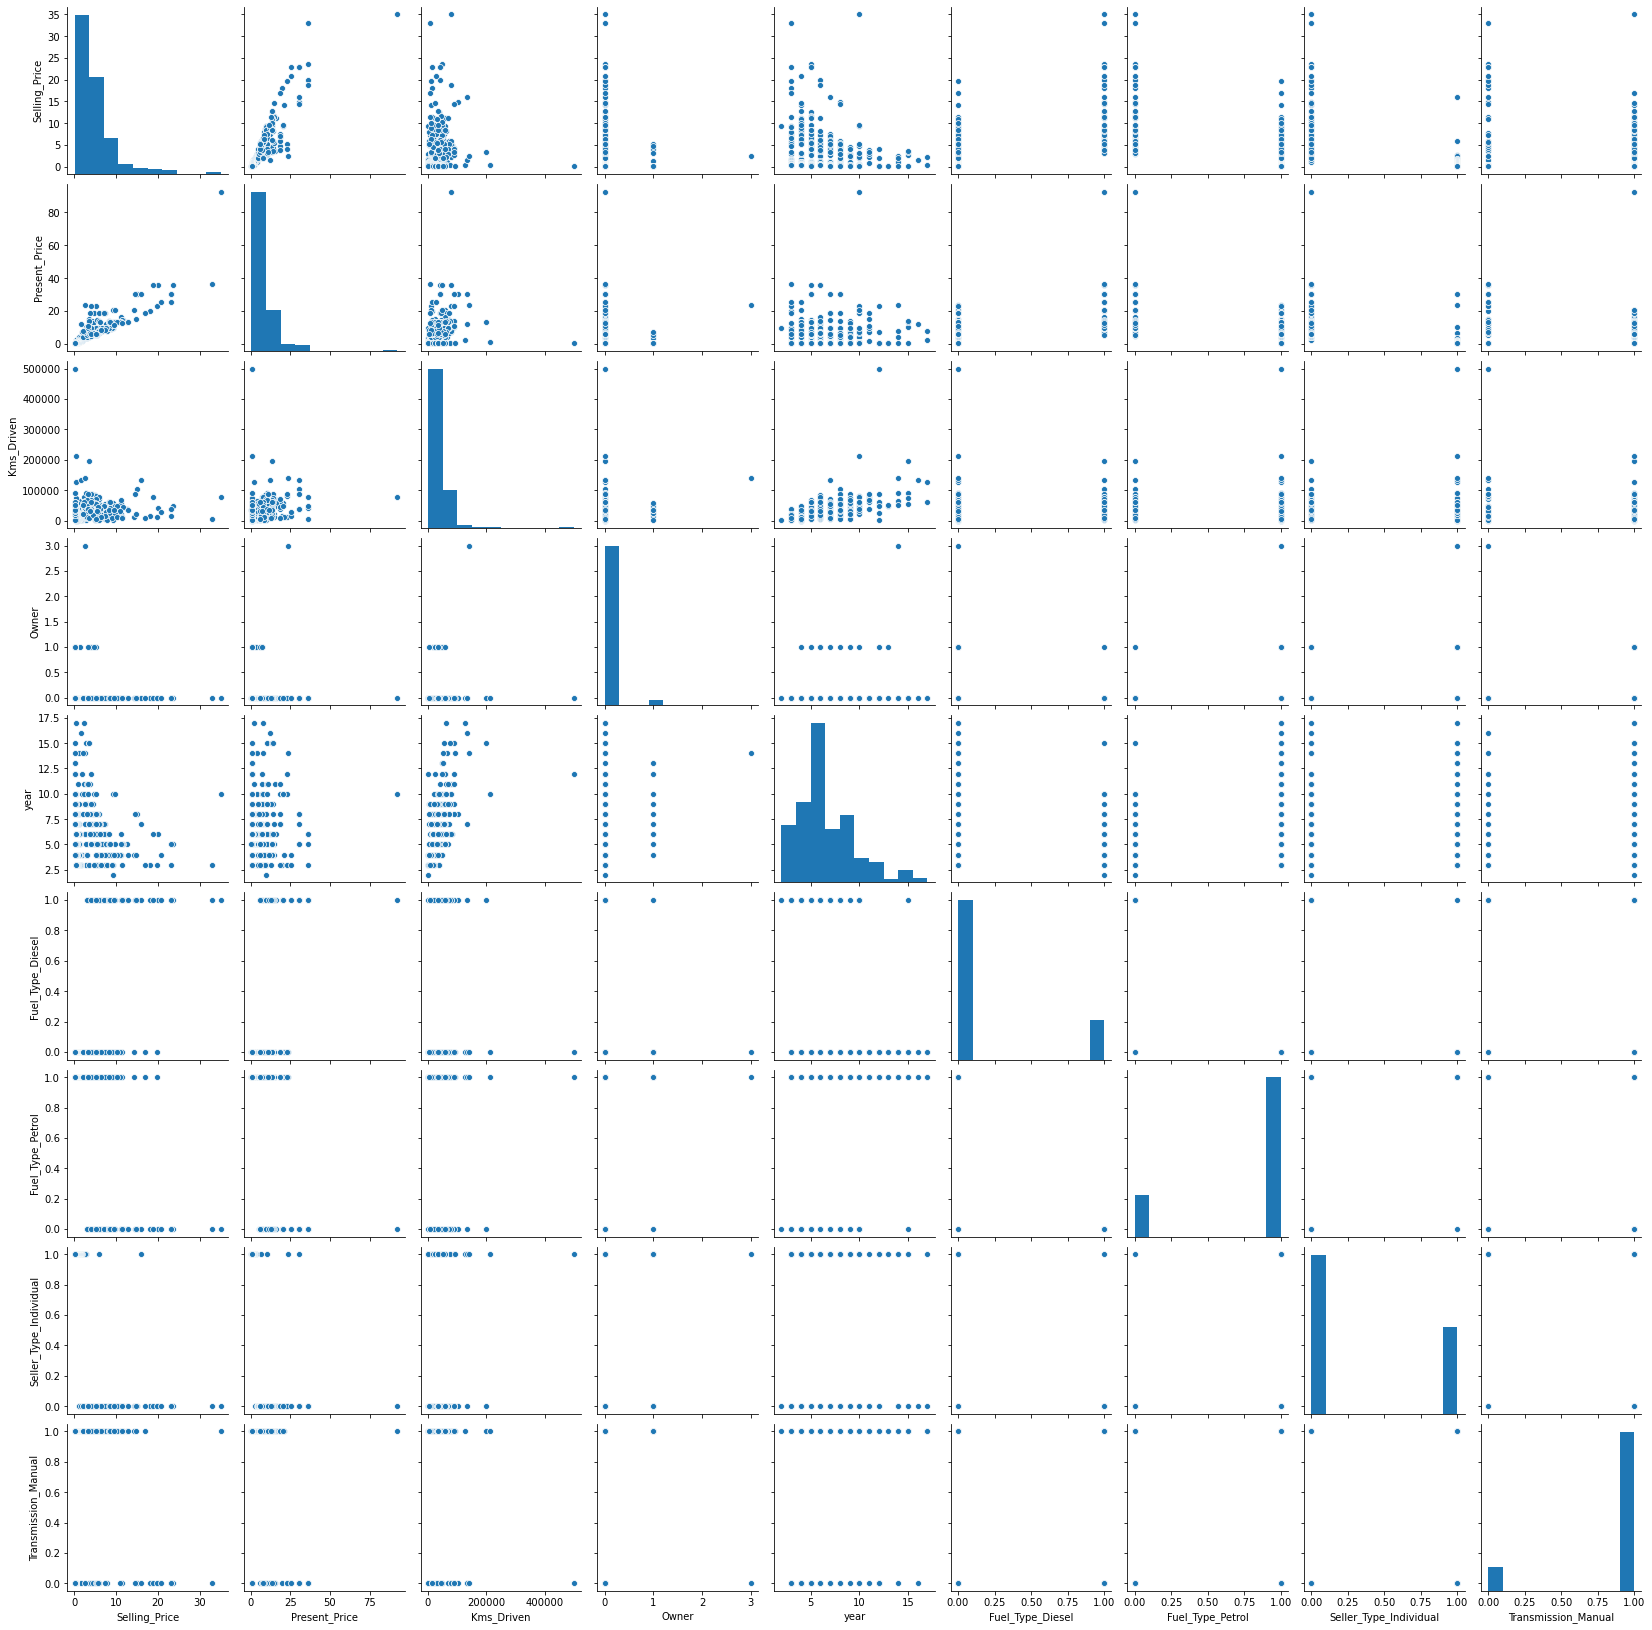

In [54]:
import seaborn as sns #pair plot
sns.pairplot(newdata)

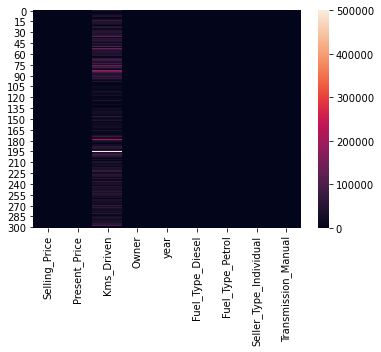

In [55]:
sns.heatmap(newdata) # heta map

In [56]:
x=newdata.iloc[:,1:] #independent 
y=newdata.iloc[:,0] #fdependemt

In [57]:
x.head(2) #independent data

,Present_Price,Kms_Driven,Owner,year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1


In [58]:
y.head(2) #dependednt data

0    3.35
1    4.75
Name: Selling_Price, dtype: float64

In [59]:
from sklearn.ensemble import ExtraTreesRegressor # creating model and fitting data sets to egt best features among them 
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [60]:
model.feature_importances_ #important feature

array([0.38985132, 0.04336382, 0.00064544, 0.07603483, 0.21281428,
       0.01402011, 0.1292151 , 0.13405509])

In [61]:
from sklearn.model_selection import train_test_split #divding train test split 20%
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2)

In [62]:
print(xtrain.shape) #shapes of all train test X Y data
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(240, 8)
(240,)
(61, 8)
(61,)


In [63]:
from sklearn.ensemble import RandomForestRegressor #random forest regressor
regressor=RandomForestRegressor()

In [78]:
#hyper parameter tunning start
#creating varaibles for random forest 
#giving some range

In [77]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
max_features = ["auto", "sqrt"]
print(max_features)
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
print(max_depth)
min_samples_split = [2, 5, 10, 15, 100]
print(min_samples_split)
min_samples_leaf = [1, 2, 5, 10]
print(min_samples_leaf)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
['auto', 'sqrt']
[5, 10, 15, 20, 25, 30]
[2, 5, 10, 15, 100]
[1, 2, 5, 10]


In [66]:
random_grid = {"n_estimators": n_estimators,
               "max_features": max_features,
               "max_depth": max_depth,
               "min_samples_split": min_samples_split,
               "min_samples_leaf": min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [67]:
rf=RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV # creating model that perfrom hyperparameter tunning (random search cv)
cv=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring="neg_mean_squared_error", n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [68]:
cv.fit(xtrain,ytrain) #fitting rondom search cv in xtrain and y train

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   36.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [69]:
cv.best_params_ #best estimators are as follows

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [70]:
cv.best_score_

-3.815714791668087

In [71]:
predictions=cv.predict(xtest) #predicting Xtest
print(predictions)

[ 4.63155255  4.37312636  5.08955761  6.18957016  3.84322169  4.42280327
  0.68693176  4.4623475   5.12084786  2.91385898  0.42314328  2.87952048
  5.18041539 10.25433243  2.90589993  9.05359771  2.94961159  3.2070723
  0.42150841 22.3945598   0.50395985  0.30173555  0.30585625 11.80886884
  0.41508641  5.71174806  0.57358493  5.91747663  5.42870907  1.40556433
  2.99153343  1.1826066   4.70606902  6.56376676  0.42314328  7.54277691
 10.93304863  2.90112543  1.15898118  7.54391614  0.79719417  0.65463561
  5.31849612  0.6341847  10.27855302  0.24313758  7.19272162  5.71716339
  4.72271581 10.43719978  0.69443592 22.45963122  7.56911082  3.92145996
  9.9770348   7.14725387  8.62312247  5.86958025  1.18213537  4.14005416
  3.18686855]


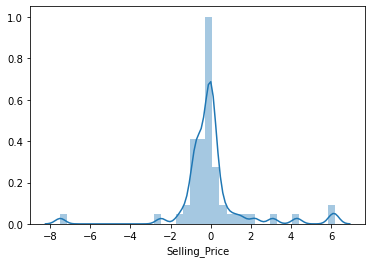

In [72]:
sns.distplot(ytest-predictions) #plotting sns ytest-ypred

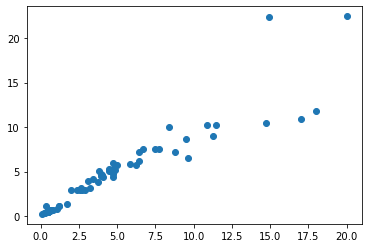

In [73]:
plt.scatter(ytest,predictions) #scatter plot for ytest and predcited value

In [79]:
#creating ,fitting applying random forest model
regressor=RandomForestRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features="sqrt",max_depth=25)
regressor.fit(xtrain,ytrain)
ypred = regressor.predict(xtest)
#score=accuracy_score(ypred,ytest)
from sklearn.metrics import r2_score # r2 for accuracy sore in regression problem
finalscore=r2_score(ytest, ypred)

In [75]:
# confusiom matrix for regression problem
#confusion_matrix(ytest,ypred)
cutoff = 0.7                              # decide on a cutoff limit
ypred_classes = np.zeros_like(ypred)    # initialise a matrix full with zeros
ypred_classes[ypred > cutoff] = 1   

In [76]:
ytest_classes = np.zeros_like(ypred)
ytest_classes[ytest > cutoff] = 1
confusion_matrix(ytest_classes, ypred_classes)

array([[10,  3],
       [ 0, 48]], dtype=int64)

In [81]:
print("score of our mdoel is ",+finalscore)

score of our mdoel is  0.9176666154729233
